# Comprehensive Analysis of Communities and Crime Data Using Machine Learning

### Overview of the Dataset

The Communities and Crime dataset, also sourced from the UCI Machine Learning Repository, consists of various features reflecting community attributes and crime statistics. For this analysis, the first 1495 rows were used as a training set, with the remainder serving as a test set.

### Analytical Techniques and Findings

- **Data Preparation**: After addressing missing values through data imputation and disregarding nonpredictive features, the dataset was ready for analysis.
- **Feature Analysis**:
  - A correlation matrix for the dataset features was plotted to identify relationships.
  - The Coefficient of Variation (CV) was calculated for each feature to assess variability relative to the mean.
  - The top features with the highest CV were visually analyzed through scatter plots and box plots, offering insights into their significance.
- **Model Fitting and Evaluation**:
  - **Linear Models**: A linear model using least squares was fitted to the training data, and its performance was evaluated on the test set.
  - **Ridge Regression**: Applied with λ chosen via cross-validation, highlighting the impact of regularization on model complexity and test error.
  - **LASSO**: Both unstandardized and standardized features were used to fit LASSO models, allowing for feature selection and comparison of test errors.
  - **PCR**: A Principal Component Regression model was constructed, optimizing the number of components through cross-validation.
  - **Boosting**: Employing L1-penalized gradient boosting trees (using XGBoost), the model was optimized to determine the regularization term α via cross-validation.

### Conclusions

The comprehensive analyses of both the Acute Inflammations and Communities and Crime datasets demonstrate the applicability of machine learning techniques across different domains, from medical diagnostics to crime data analysis. Through interpretative models like decision trees and advanced regression techniques, significant predictors were identified, contributing to the development of predictive models with practical implications in healthcare diagnostics and community safety.



In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn import tree
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Load Data

In [39]:
df_communities = pd.read_csv('../data/communities.csv', header=None)
atrributes = [
    "state", "county", "community", "communityname", "fold", "population",
    "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban",
    "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
    "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap",
    "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
    "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy",
    "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce",
    "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par",
    "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
    "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8",
    "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup",
    "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup",
    "PctHousOwnOcc", "PctVacantBoarded", "PctVacantMore6Mos", "MedYrHousBuilt", "PctHousNoPhone",
    "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ",
    "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc",
    "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
    "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack",
    "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz",
    "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
    "ViolentCrimesPerPop"
]

df_communities.columns = atrributes

## Dealing with missing values

In [40]:
# Removing non-predictive attributes
df_communities = df_communities.iloc[:, 5:]

# Replace '?' with 'NaN'
df_communities.replace('?', np.nan, inplace=True)

# Convert the DataFrame to numeric
df_communities = df_communities.apply(pd.to_numeric, errors='ignore')

# Impute NaN values with the mean of each column
df_communities.fillna(df_communities.mean(), inplace=True)
df_communities.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20   0.060000       0.040000   
1      0.02     0.12            0.45   0.163103       0.076708   
2      0.01     0.21            0.02   0.163103       0.076708   
3      0.02     0.39            0.28   0.163103       0.076708   
4      0.04     0.09            0.02   0.163103       0.076708   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0             0.900000             0.500000                 0.32   
1             0.698589             0.440439                 0.00   
2             0.698589             0.440439                 0.00   
3             0.698589             0.440439                 0.00   
4             0.698589             0.440439                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0         0.140000                 0.20  
1         0.195078                 0.67  
2         0.195078                 0.43  
3         0.195078                 0.12  
4         0.195078                 0.03  

[5 rows x 123 columns]

## Plotting correlation matrix

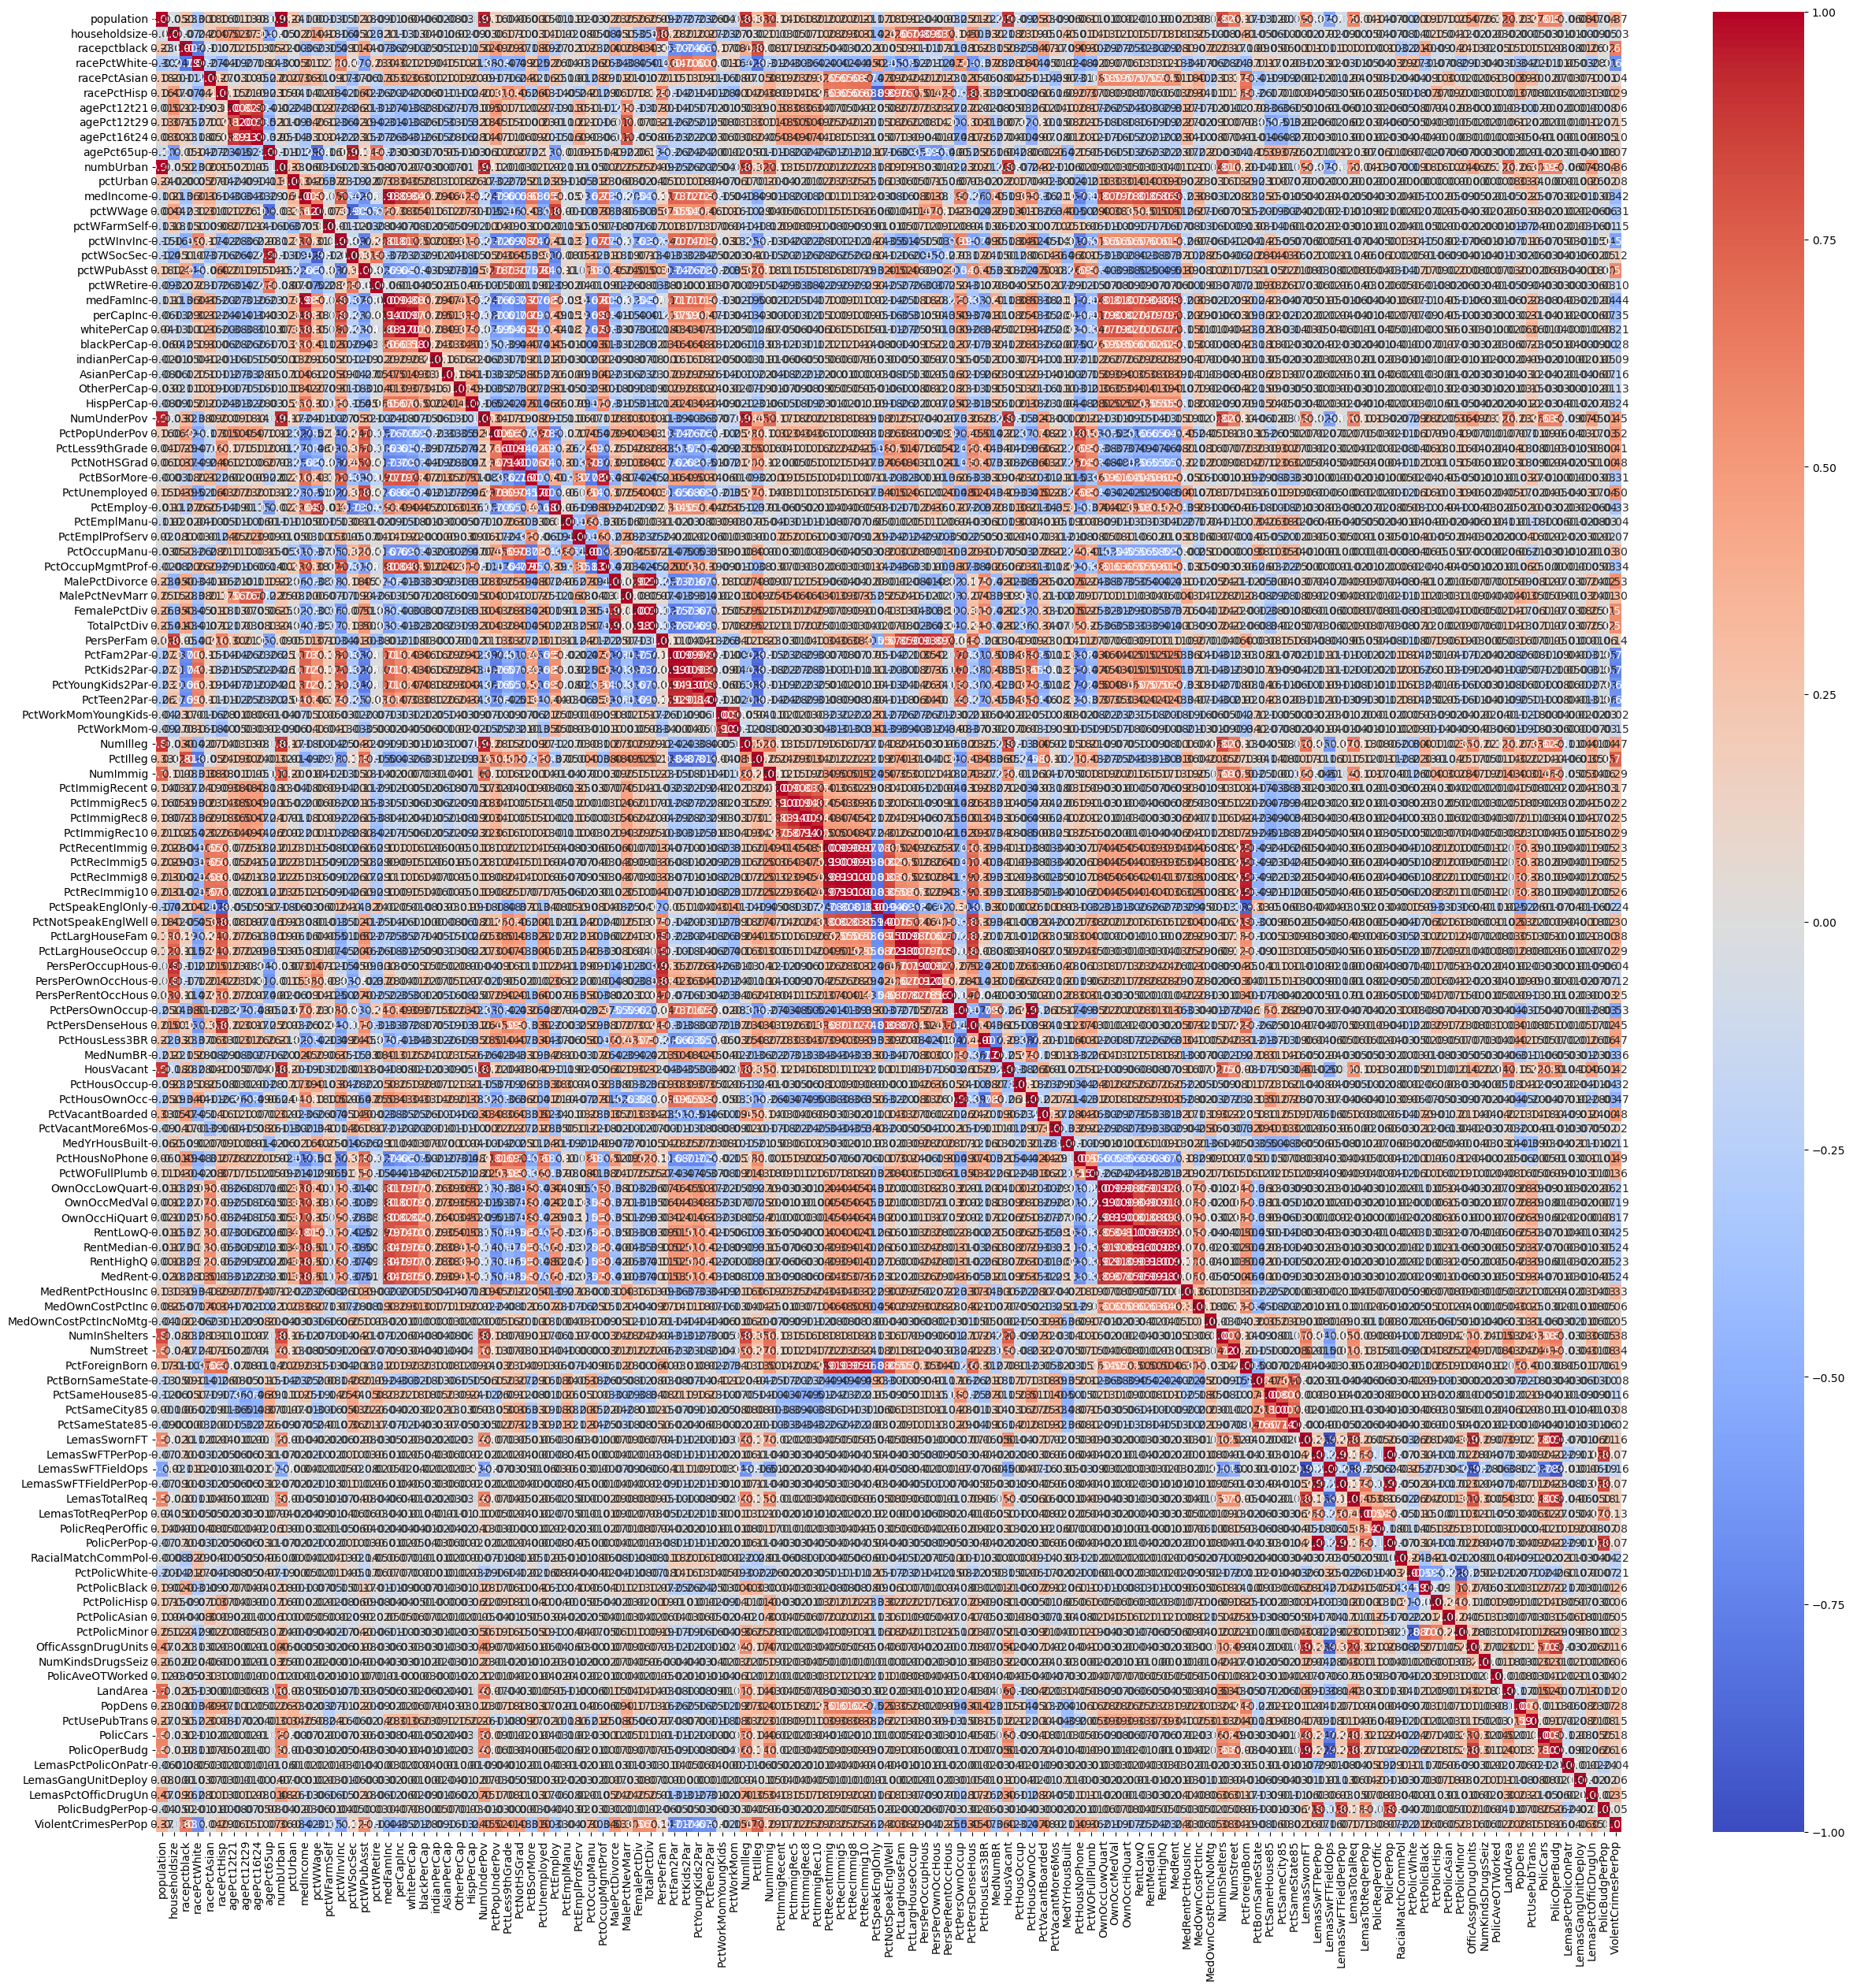

In [41]:
correlation_matrix = df_communities.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Calculating the Coefficient of Variation (CV)

In [43]:
# Calculate the coefficient of variation for each column
means = df_communities.mean()
std_devs = df_communities.std()
cv = (std_devs / means) * 100
cv

population             220.350254
householdsize           35.329830
racepctblack           141.092040
racePctWhite            32.378156
racePctAsian           135.916219
                          ...    
LemasPctPolicOnPatr     12.233126
LemasGangUnitDeploy     36.804007
LemasPctOfficDrugUn    255.526600
PolicBudgPerPop         33.728080
ViolentCrimesPerPop     97.901480
Length: 123, dtype: float64

## Scatter plots and box plots for highest CV features

In [44]:
# Picking features with the highest CV
b = int(np.sqrt(128))
top_features = cv.nlargest(b).index

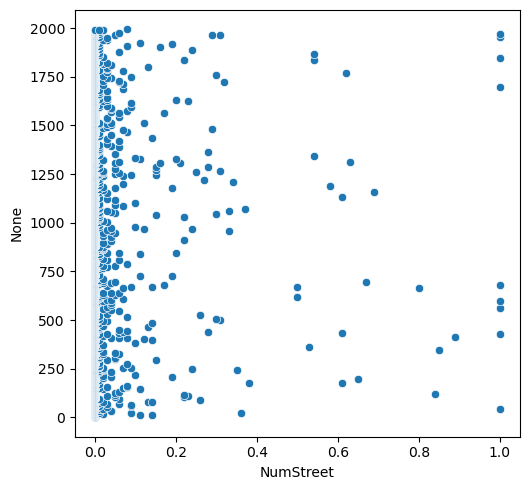

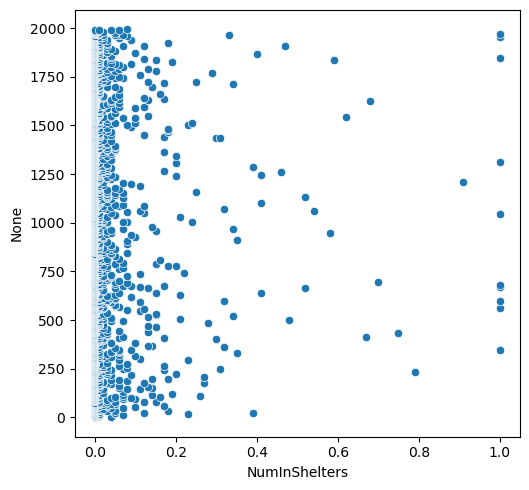

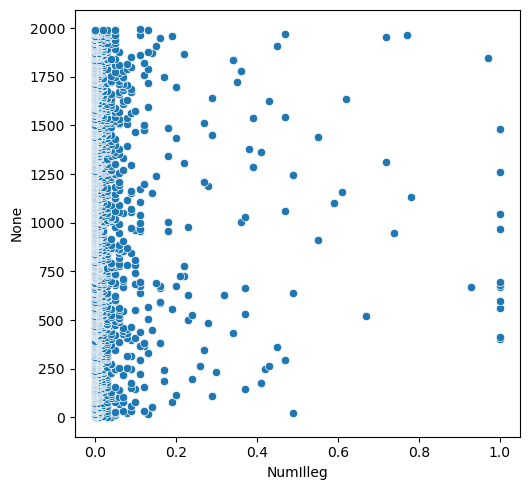

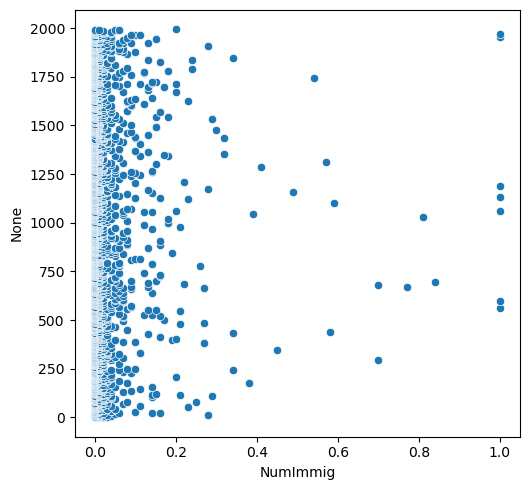

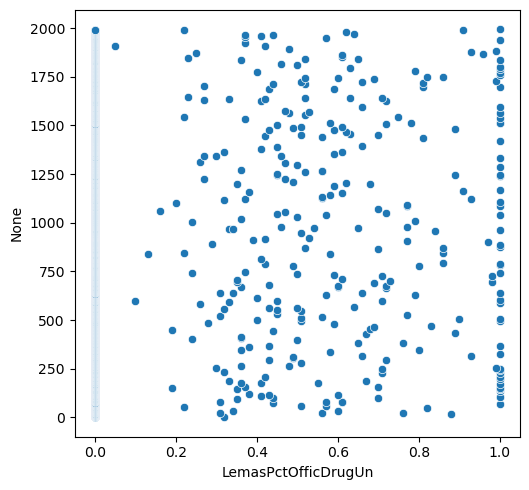

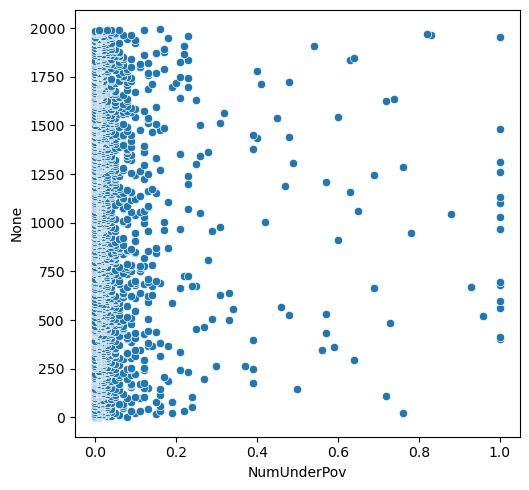

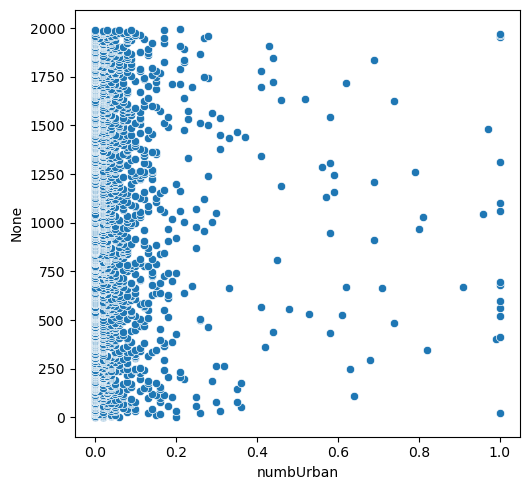

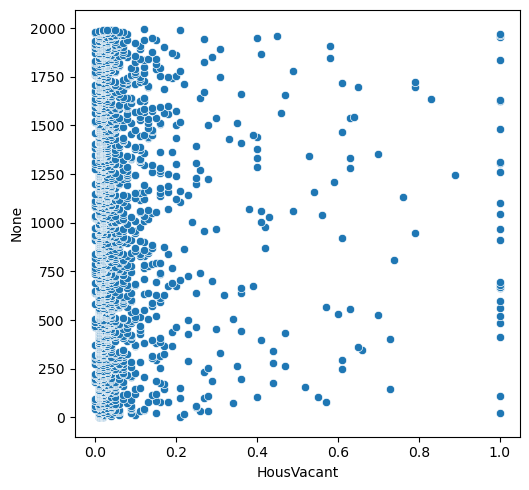

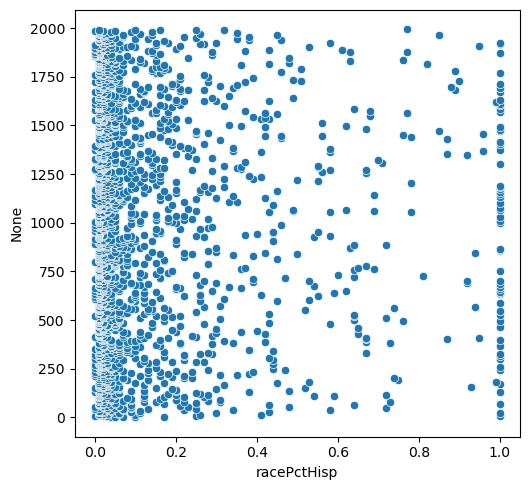

In [45]:
# Scatter plots of top features
for feature in top_features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_communities, x=feature, y=df_communities.index)
    plt.tight_layout()
    plt.show()


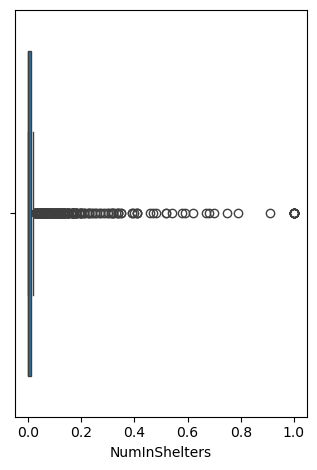

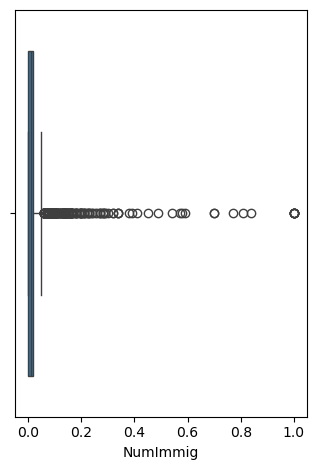

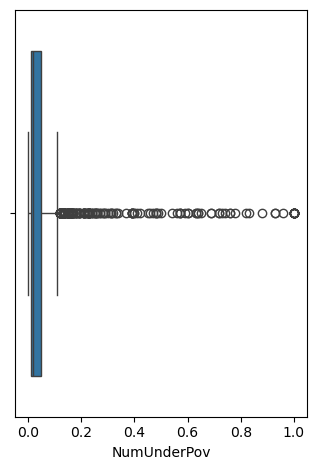

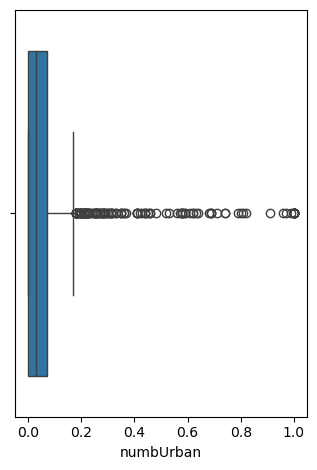

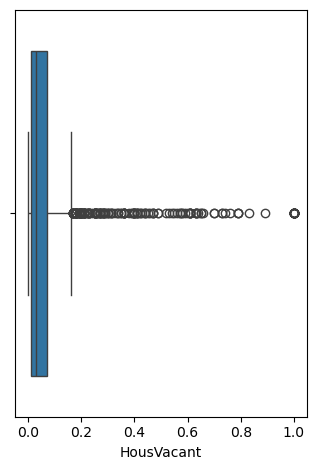

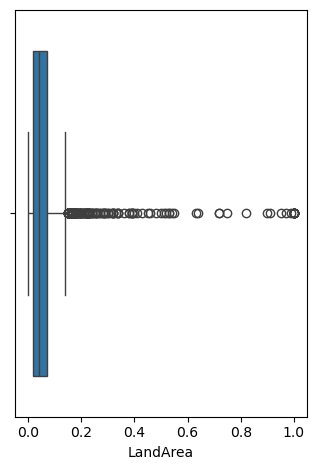

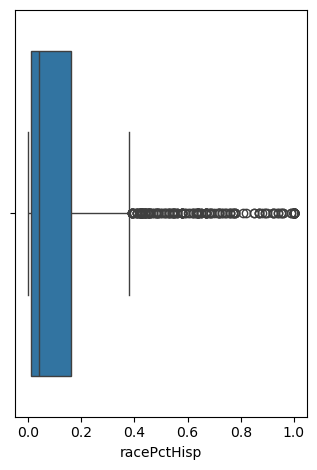

In [46]:
# Box plots of top features
for feature in top_features:
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_communities, x=feature)
    plt.tight_layout()
    plt.show()

In [1]:
print("The scatter plots dont really provide that much information, but it does seem that the boxplots reveal that a tremendous amount of outliers lie in the higher range.")

The scatter plots dont really provide that much information, but it does seem that the boxplots reveal that a tremendous amount of outliers lie in the higher range.


# Fitting a linear model

In [48]:
# Separate the features and the target
X = df_communities.drop('ViolentCrimesPerPop', axis=1)
X = sm.add_constant(X)
X.columns = X.columns.astype(str)

y = df_communities['ViolentCrimesPerPop'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.713
Model:                             OLS   Adj. R-squared:                  0.689
Method:                  Least Squares   F-statistic:                     29.91
Date:                 Fri, 27 Oct 2023   Prob (F-statistic):          6.98e-317
Time:                         20:43:50   Log-Likelihood:                 1060.4
No. Observations:                 1595   AIC:                            -1875.
Df Residuals:                     1472   BIC:                            -1214.
Df Model:                          122                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1540      0.733      1.574      0.116      -0.284       2.592
population                0.1302      0.446      0.292      0.771      -0.745       1.006
householdsize             0.0033      0.093      0.035      0.972      -0.179       0.186
racepctblack              0.1911      0.062      3.100      0.002       0.070       0.312
racePctWhite             -0.0490      0.070     -0.699      0.484      -0.186       0.088
racePctAsian             -0.0126      0.039     -0.319      0.750      -0.090       0.065
racePctHisp               0.0073      0.063      0.116      0.907      -0.115       0.130
agePct12t21               0.0560      0.117      0.476      0.634      -0.174       0.286
agePct12t29              -0.2897      0.171     -1.689      0.091      -0.626       0.047
agePct16t24              -0.0559      0.182     -0.307      0.759      -0.414       0.302
agePct65up                0.0374      0.114      0.327      0.744      -0.187       0.262
numbUrban                -0.2851      0.432     -0.660      0.509      -1.132       0.562
pctUrban                  0.0418      0.017      2.390      0.017       0.007       0.076
medIncome                -0.2584      0.189     -1.370      0.171      -0.628       0.111
pctWWage                 -0.1679      0.099     -1.689      0.091      -0.363       0.027
pctWFarmSelf              0.0508      0.022      2.310      0.021       0.008       0.094
pctWInvInc               -0.1569      0.074     -2.108      0.035      -0.303      -0.011
pctWSocSec                0.0641      0.120      0.535      0.593      -0.171       0.299
pctWPubAsst              -0.0147      0.051     -0.291      0.771      -0.114       0.084
pctWRetire               -0.0713      0.041     -1.741      0.082      -0.152       0.009
medFamInc                 0.3367      0.176      1.917      0.055      -0.008       0.681
perCapInc                 0.0608      0.216      0.281      0.779      -0.363       0.485
whitePerCap              -0.3056      0.179     -1.708      0.088      -0.657       0.045
blackPerCap              -0.0331      0.028     -1.180      0.238      -0.088       0.022
indianPerCap             -0.0450      0.021     -2.094      0.036      -0.087      -0.003
AsianPerCap               0.0246      0.021      1.166      0.244      -0.017       0.066
OtherPerCap               0.0370      0.020      1.805      0.071      -0.003       0.077
HispPerCap                0.0401      0.028      1.442      0.150      -0.014       0.095
NumUnderPov               0.0767      0.177      0.434      0.664      -0.270       0.423
PctPopUnderPov           -0.1306      0.070     -1.868      0.062      -0.268       0.007
PctLess9thGrade          -0.0823      0.076     -1.079      0.281      -0.232       0.067
PctNotHSGrad

In [49]:
print("Test MSE:", mean_squared_error(y_test, y_pred))

Test MSE: 0.021588726166209674


# Fitting a ridge regression model

In [50]:
# Create list of alphas and the train ridge CV
alphas = [0.001, 0.01, 0.1, 1, 10]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

y_pred = ridge_cv.predict(X_test)

print("Test MSE", mean_squared_error(y_test, y_pred))
print("Alpha chosen:", ridge_cv.alpha_)

Test MSE 0.020958074493336074
Alpha chosen: 1.0


# Fiting a LASSO model

## Unstandardized

In [51]:
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso_cv.fit(X_train, y_train)

y_pred = lasso_cv.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_error)

selected_features = X_train.columns[lasso_cv.coef_ != 0]
print("Selected Variables:", selected_features)


Test MSE: 0.021006585552271587
Selected Variables: Index(['racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29',
       'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWRetire', 'indianPerCap',
       'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctUnemployed', 'PctEmplManu', 'MalePctDivorce',
       'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctRecImmig10', 'PctSpeakEnglOnly',
       'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacantMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn',
       'PctBornSameState', 'PctSameCity85', 'PolicReqPerOffic',
       'RacialMatchCommPol', 'PctPolicWhite', 'PolicAveOTWorked', 'PopDens',
       'PctUsePubTrans', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn']

## Standardized

In [52]:
# Here I scale the data and rerun the lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv_scaled = LassoCV(cv=5, random_state=42, max_iter=5000)
lasso_cv_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lasso_cv_scaled.predict(X_test_scaled)

test_error_scaled = mean_squared_error(y_test, y_pred_scaled)
print("Test MSE:", test_error_scaled)

selected_features_scaled = X_train.columns[lasso_cv_scaled.coef_ != 0]
print("Selected Variables:", selected_features_scaled)


Test MSE: 0.021321730446815918
Selected Variables: Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'PctEmplManu',
       'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom',
       'PctIlleg', 'PctRecImmig10', 'PctPersDenseHous', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc',
       'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'PctPolicWhite', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn'],
      dtype='object')


# Fitting a PCR model

In [53]:
# Initialize model
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
pca_model = PCA()
linear_model = LinearRegression()

# Create pipeline
pipe = Pipeline([('dimension_reduction', pca_model), ('linear_regression', linear_model)])

# Iterate through all principal components and then store the mse in a list
mean_squared_errors = []
for i in range(1, X_train.shape[1] + 1):
    pipe.set_params(dimension_reduction__n_components=i)
    mse = -np.mean(cross_val_score(pipe, X_train, y_train, cv=cross_val, scoring='neg_mean_squared_error'))
    mean_squared_errors.append(mse)


In [54]:
# Set number of components to the lowest mean squared error achieved, then fit the model
optimal_num_components = np.argmin(mean_squared_errors) + 1
pipe.set_params(dimension_reduction__n_components=optimal_num_components)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))

Test MSE: 0.0212112461170281


# Fitting a boosting tree

In [55]:
model = xgb.XGBRegressor(objective ='reg:squarederror', booster='gbtree', reg_alpha=0, random_state = 100)
alpha_range = [0.001, 0.01, 0.1, 1, 10]

results = {}

cv = KFold(n_splits=5, shuffle=True, random_state=100)

# Iterate over each of the alpha values using CV
cv = KFold(n_splits=5, shuffle=True, random_state=100)

for alpha in alpha_range:
    model.set_params(reg_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)
    results[alpha] = mse

# Best alpha and lowest error for training set
best_alpha = min(results, key=results.get)
lowest_error = results[best_alpha]
print(f"Best alpha: {best_alpha} and the lowest MSE: {lowest_error}")


Best alpha: 1 and the lowest MSE: 0.01989637050129618


In [56]:
# Testing the best alpha on the test set
best_alpha = min(results, key=results.get)
model.set_params(reg_alpha=best_alpha)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Test MSE: ", mean_squared_error(y_test, predictions))


Test MSE:  0.023271754485902244
